# Phase 2: Data Understanding – Craigslist Cars & Trucks Dataset

## 1. Load and Preview the Dataset



In [2]:
import pandas as pd

# Load dataset (update path as needed)
df = pd.read_csv("../../downloads/archive/vehicles.csv")

# Show basic info and preview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## 2. Describe the Content of the Data


In [3]:
# Display column names and types
df.dtypes

# Describe numerical columns
df.describe()

# Describe categorical columns
df.select_dtypes(include='object').describe()


,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://wyoming.craigslist.org/ctd/d/conrad-20...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


## 3. Initial Data Exploration and Visualization


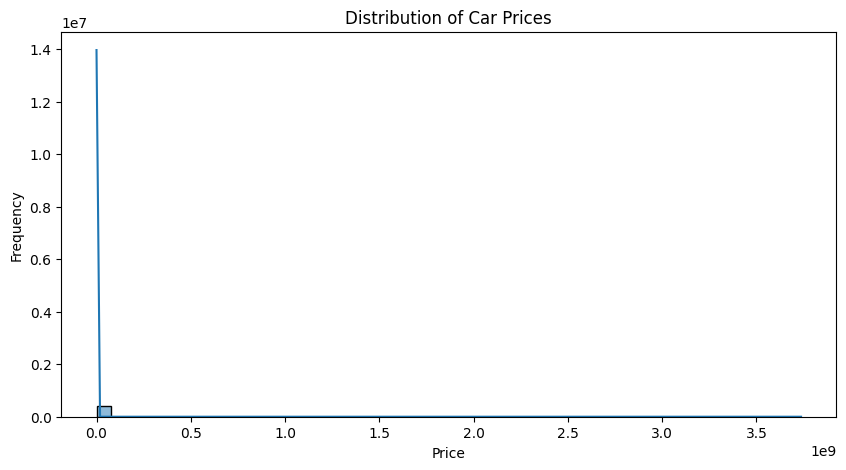

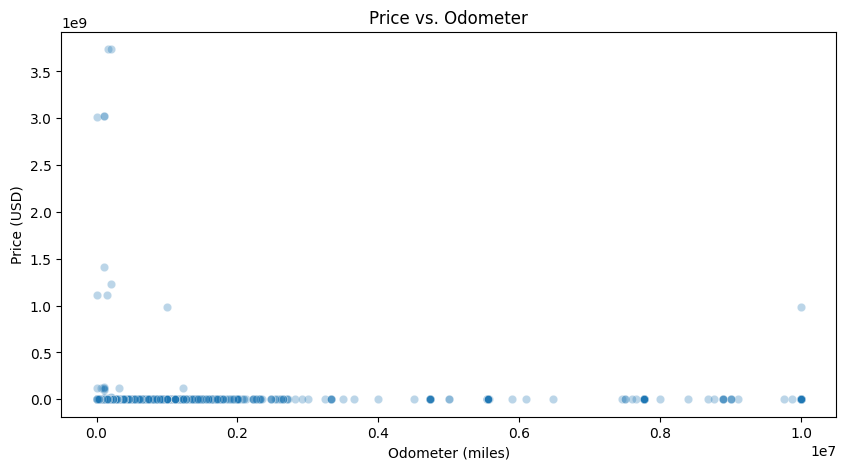

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of price
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Price vs. Odometer
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.3)
plt.title("Price vs. Odometer")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price (USD)")
plt.show()


## 4. Data Quality Check


In [5]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check outliers in price
print("Price range:", df['price'].min(), "to", df['price'].max())
df[df['price'] < 100]  # Possibly invalid
df[df['price'] > 100000]  # Possibly luxury or incorrect


Number of duplicate rows: 0
Price range: 0 to 3736928711


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
280,7315849335,https://bham.craigslist.org/cto/d/trussville-1...,birmingham,https://bham.craigslist.org,987654321,1960.0,chevrolet,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00E0E_fZYzwRGkoI...,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,NaN,al,33.633900,-86.598100,2021-05-02T13:24:09-0500
1727,7302443955,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,130000,2019.0,chevrolet,corvette,like new,8 cylinders,...,NaN,coupe,blue,https://images.craigslist.org/00i0i_hXysWO79nV...,Z06 Customized Super Charged Corvette! Year: 2...,NaN,al,33.633900,-86.598100,2021-04-05T22:11:19-0500
1838,7315961634,https://dothan.craigslist.org/cto/d/black-ford...,dothan,https://dothan.craigslist.org,99999999,1993.0,ford,ranger,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00707_aAWsmapBxU...,"1993 Ford Ranger, extended cab, 3.0 liter, ne...",NaN,al,31.053493,-85.825968,2021-05-02T17:18:25-0500
2922,7313297746,https://huntsville.craigslist.org/cto/d/grant-...,huntsville / decatur,https://huntsville.craigslist.org,140000,2015.0,jeep,renegade,like new,6 cylinders,...,mid-size,SUV,yellow,https://images.craigslist.org/00909_evfUq96WMy...,This vehicle is still financed through whole s...,NaN,al,34.495900,-86.259000,2021-04-27T09:21:39-0500
4797,7302285034,https://montgomery.craigslist.org/ctd/d/portla...,montgomery,https://montgomery.craigslist.org,104000,2018.0,dodge,NaN,NaN,8 cylinders,...,compact,other,NaN,https://images.craigslist.org/00000_bCahx46v88...,2018 *** Dodge Challenger SRT Demon*** ...,NaN,al,45.494265,-122.579192,2021-04-05T15:50:38-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419656,7317021019,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,119900,2021.0,chevrolet,corvette,good,8 cylinders,...,mid-size,coupe,red,https://images.craigslist.org/00u0u_70wb72g0xD...,2021 Chevrolet Corvette 2dr Stingray Cpe w/3LT...,NaN,wi,43.029559,-89.397796,2021-05-04T18:47:19-0500
419756,7316648420,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,119995,2004.0,acura,nsx,NaN,6 cylinders,...,NaN,coupe,black,https://images.craigslist.org/00F0F_eQpU68RrA0...,2004 Acura NSX NSX-TABSOLUTELY STUNNING !!L...,NaN,wi,43.063100,-89.313300,2021-05-04T07:26:45-0500
420693,7311450715,https://madison.craigslist.org/cto/d/madison-2...,madison,https://madison.craigslist.org,125000,2014.0,porsche,911 turbo s,excellent,6 cylinders,...,full-size,coupe,black,https://images.craigslist.org/00i0i_1pKGoWahGi...,10k miles awd obsidian black always serviced a...,NaN,wi,43.037200,-89.397100,2021-04-23T12:43:37-0500
424281,7310185437,https://milwaukee.craigslist.org/ctd/d/miami-2...,milwaukee,https://milwaukee.craigslist.org,299500,2018.0,NaN,Lamborghini Aventador,NaN,12 cylinders,...,sub-compact,coupe,blue,https://images.craigslist.org/00p0p_d3hdDrrzvc...,Elite Motor Cars of MiamiAsk for: Sales☎ (786)...,NaN,wi,25.827103,-80.241520,2021-04-20T22:38:41-0500


## 5. Data Formats and Structure


In [6]:
# Confirm file format and structure
print("DataFrame shape:", df.shape)
print("Column types:\n", df.dtypes)

# Parse dates
if 'posting_date' in df.columns:
    df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
    print("Date parsing complete.")


DataFrame shape: (426880, 26)
Column types:
 id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object
Date parsing complete.


C:\Users\tomas\AppData\Local\Temp\ipykernel_52360\1370113971.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')


## 6. Grouping and Visualization Tools


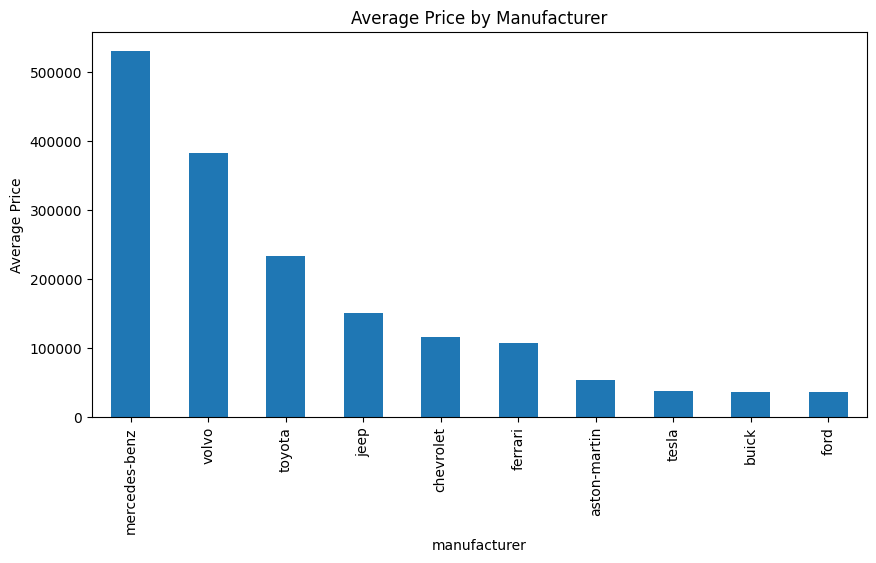

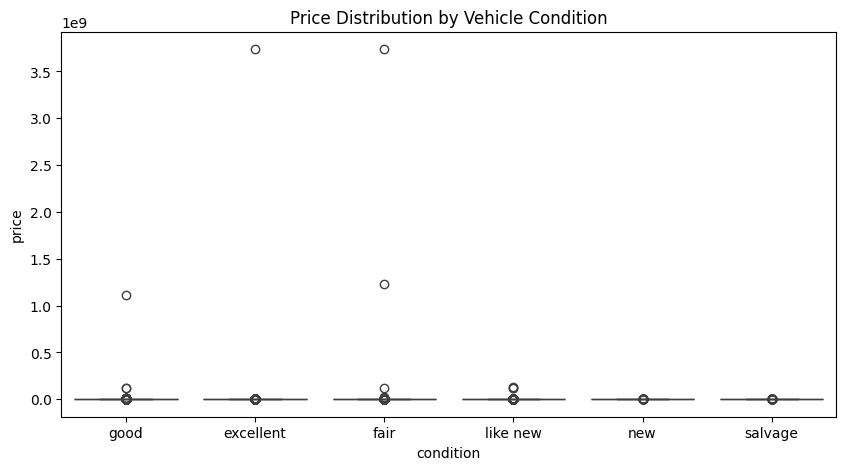

In [7]:
# Average price per manufacturer
avg_price_by_make = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
avg_price_by_make.head(10).plot(kind='bar', figsize=(10, 5), title='Average Price by Manufacturer')
plt.ylabel("Average Price")
plt.show()

# Boxplot of price by condition
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='condition', y='price')
plt.title("Price Distribution by Vehicle Condition")
plt.show()
